# Installing the SDK

The SDK installer is included as part of the SeisWare installer. We currently support Python 3.7.

When installing the SDK, make sure no "python.exe" processes are running in Task Manager. You can choose to add to the PYTHONPATH when selecting the SDK to install.

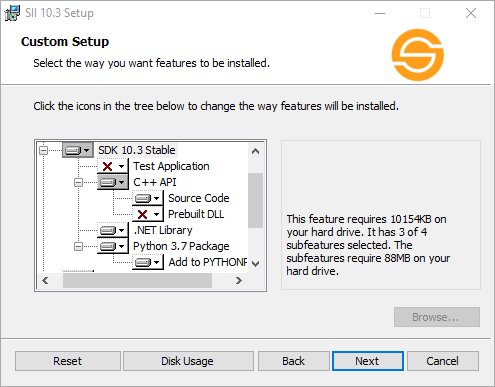

Once imported, try running the test application.

Note: If any Python process was running before install, relaunch EVERYTHING.

# Importing the required modules

To use the SDK we import the entire SeisWare module. We also include sys and some matplotlib libraries for graphing.

The "handle_error" function helps us prevent everything from crashing.

In [1]:
import sys
import SeisWare
import mpl_toolkits.mplot3d
import matplotlib.pyplot

def handle_error(message, error):
    """
    Helper function to print out the error message to stderr and exit the program.
    """
    print(message, file=sys.stderr)
    print("Error: %s" % (error), file=sys.stderr)
    sys.exit(1)


## Connecting to the API Server

In order to connect to a project, we must first connect to a server. This is done through the Connect method of a SeisWare.Connection object.
    

In [2]:
connection = SeisWare.Connection()

try:
    serverInfo = SeisWare.Connection.CreateServer()
    connection.Connect(serverInfo.Endpoint(), 5000)
except RuntimeError as err:
    handle_error("Failed to connect to the server", err)


If the following error appears, you may need to run the cell again. Check Task Manager to make sure "SWAPIServer.exe" is running. "SWAPIService.exe" is NOT the same.

Failed to connect to the server
Error: APIServer executable could not be located.

# Getting the project list

Once we are connected to a server we can get a list of all the project by calling GetAll on the ProjectManager, which we get through the Connection object. After we have all the projects in our ProjectList, we go through them and find the project that has our passed in name. 

In [3]:
project_list = SeisWare.ProjectList()

try:
    connection.ProjectManager().GetAll(project_list)
except RuntimeError as err:
    handle_error("Failed to get the project list from the server", err)


We can see a list of our projects by iterating through the project_list

In [4]:
for project in project_list:
    print(project.Name())

SeisWare Trial Data Set


In [5]:
# Get the project we want to connect to
project_name = "SeisWare Trial Data Set"

projects = [project for project in project_list if project.Name() == project_name]
if not projects:
    print("No project was found", file=sys.stderr)
    sys.exit(1)

In [6]:
projects

[<SeisWare.Project; proxy of <Swig Object of type 'SeisWare::Project *' at 0x00000272A216A600> >]

# Connecting to the project

We then have to connect to that project by creating a SeisWare.LoginInstance object and calling Open on it with our connection and project.


In [8]:
login_instance = SeisWare.LoginInstance()
try:
    login_instance.Open(connection, projects[0])
except RuntimeError as err:
    handle_error("Failed to connect to the project", err)

In [9]:
login_instance

<SeisWare.LoginInstance; proxy of <Swig Object of type 'SeisWare::LoginInstance *' at 0x000002729FA930F0> >

# Getting the wells in the project

We first get all the wells from the project by calling GetAll on the WellManager, which we get through our 
LoginInstance object.



We then go through all the wells, looking for the well with our passed in UWI and return it.


In [10]:
# Get the wells from the project
well_list = SeisWare.WellList()
try:
    login_instance.WellManager().GetAll(well_list)
except RuntimeError as err:
    handle_error("Failed to get all the wells from the project", err)

We then print out how many wells our project has along with the names of 5 of the 
wells. 

In [11]:
print("Number of wells in project: %i" % (len(well_list)))
print("Names of 5 wells: %s" % (", ".join([well.Name() for well in well_list[:5]])))

Number of wells in project: 7
Names of 5 wells: Well 3, Well 4, Well 1, Well 7, Well 6


We then go through all the wells, looking for the well with our passed in UWI and return it.

In [12]:
well_uwi = "Well 1"


# Get the well we want
wells = [well for well in well_list if well.UWI() == well_uwi]
if not wells:
    print("No well was found", file=sys.stderr)
    sys.exit(1)

# Return the well of the passed in UWI

well = wells[0]


In [13]:
help(well)

Help on Well in module SeisWare object:

class Well(builtins.object)
 |  Well(*args)
 |  
 |  Methods defined here:
 |  
 |  BottomHole(self, *args)
 |  
 |  BottomLoc(self, *args)
 |  
 |  County(self, *args)
 |  
 |  DatumElevation(self, *args)
 |  
 |  DepthDatumUnit(self, *args)
 |  
 |  Description(self, *args)
 |  
 |  Field(self, *args)
 |  
 |  GovernmentID(self, *args)
 |  
 |  GroundElevation(self, *args)
 |  
 |  ID(self)
 |  
 |  KB(self, *args)
 |  
 |  LeaseName(self, *args)
 |  
 |  LeaseOperator(self, *args)
 |  
 |  Name(self, *args)
 |  
 |  Number(self, *args)
 |  
 |  OwnerID(self)
 |  
 |  PlatformID(self, *args)
 |  
 |  RigRelDate(self, *args)
 |  
 |  SpudDate(self, *args)
 |  
 |  State(self, *args)
 |  
 |  StatusDate(self, *args)
 |  
 |  SurfaceLoc(self, *args)
 |  
 |  Symbol(self, *args)
 |  
 |  TopHole(self, *args)
 |  
 |  TotalDepth(self, *args)
 |  
 |  UWI(self, *args)
 |  
 |  VerticalDepth(self, *args)
 |  
 |  WaterDepth(self, *args)
 |  
 |  Well

In [14]:
well.ID()

<SeisWare.ID; proxy of <Swig Object of type 'SeisWare::FilterKey *' at 0x00000272A216A3F0> >

In [15]:
well.Name()

'Well 1'

In [16]:
well.UWI()

'Well 1'


We first create a new well top, along with all required information.

The ParentID is used to set the associated well UWI. This is pulled from the Well Object created earlier by iterating through the list.

The name of the formation is set as "Formation for L&L"

The type of this new well top is MD as set by TopType, and has a depth of 1000m. The depth value must be set using a SeisWare.Measurement object with a float and a SeisWare.Unit object passed in.    


In [17]:
# Create a new well top
new_well_top = SeisWare.WellTop()

new_well_top.ParentID(well.ID())
new_well_top.Formation("Formation for L&L")
new_well_top.TopType(SeisWare.WellTopType_TVD)
new_well_top.Depth(SeisWare.Measurement(1000.0, SeisWare.Unit.Meter))

We add well tops to the project by calling Add on the WellTopManager, which we get through our LoginInstance 
object.

In [18]:
# Add the new well top to the project
try:
    login_instance.WellTopManager().Add(new_well_top)
except RuntimeError as err:
    handle_error("Failed to add the well top of well %s to the project" % (well.UWI()), err)
    

We then modify our well top depth by adding 500m to it. The depth is a SeisWare.Measurement object and in order to do math on a Measurement object we use other Measurement objects.

In [19]:
# Update the new well top's depth to be it's current depth plus 500 meters
new_well_top.Depth(new_well_top.Depth() + SeisWare.Measurement(500.0, SeisWare.Unit.Meter))


The well top is then updated by calling Update on the WellTopManager.

In [20]:
# Save the updated well top back to the project
try:
    login_instance.WellTopManager().Update(new_well_top)
except RuntimeError as err:
    handle_error("Failed to update a well top of well %s" % (well.UWI()), err)


Finally to remove a well top from our project, you call Remove on the WellTopManager and pass it the well top you want to delete.

In [21]:
# Delete the newly added well top from the project
try:
    login_instance.WellTopManager().Remove(new_well_top)
except RuntimeError as err:
    handle_error("Failed to remove the well top of well %s" % (well.UWI()), err)


# Get well tops from project

We first get all the well tops from the project for a specific well by calling GetAllForWell on the 
WellTopManager, which we get through our LoginInstance object.    

In [22]:
# Get the well tops for a well from the project
well_top_list = SeisWare.WellTopList()
try:
    login_instance.WellTopManager().GetAllForWell(well.ID(), well_top_list)
except RuntimeError as err:
    handle_error("Failed to get the well tops of well %s from the project" % (well.UWI()), err)



We then go through the WellTopList, looking for well tops that have our passed in formation names.

In [23]:
for i in well_top_list:
    print(i.TVD().Value(SeisWare.Unit.Meter))

1181.404801796
1639.595705805
1339.287178525


In [24]:
top_well_top = "Top 1"
base_well_top = "Top 2"

# Get the well tops we want
well_tops = [well_top for well_top in well_top_list if well_top.Formation() in (top_well_top, base_well_top)]
if len(well_tops) != 2:
    print("No well tops were found", file=sys.stderr)
    sys.exit(1)



After we find them, we sort them to ensure the more shallow one is first in the list.

In [25]:
# Make the first well top in the list be the more shallow one
if well_tops[0].MD() > well_tops[1].MD():
    well_tops[0], well_tops[1] = well_tops[1], well_tops[0]




Then we print out the MD of the tops. The MD is stored as a SeisWare.Measurement object and in order to get a number out, you must call Value and pass in the units you want the value back in.

In [26]:
# Print the well top depths
first_well_top_depth = well_tops[0].MD().Value(SeisWare.Unit.Meter)
second_well_top_depth = well_tops[1].MD().Value(SeisWare.Unit.Meter)
print("Depth of well top %s of well %s: %.4fm" % (well_tops[0].Formation(), well.UWI(), first_well_top_depth))
print("Depth of well top %s of well %s: %.4fm" % (well_tops[1].Formation(), well.UWI(), second_well_top_depth))
print()



Depth of well top Top 2 of well Well 1: 1181.4048m
Depth of well top Top 1 of well Well 1: 1339.2912m



Finally we return the two tops we got for our passed in formation names.

In [27]:
top_well_top = well_tops[0]
base_well_top = well_tops[1]

# Get a log curve from the project

We first get all the log curves from the project for a specific well by calling GetAllForWell on the 
LogCurveManager, which we get through our LoginInstance object. 



In [28]:

# Get the log curves for a well from the project
log_curve_list = SeisWare.LogCurveList()
try:
    login_instance.LogCurveManager().GetAllForWell(well.ID(), log_curve_list)
except RuntimeError as err:
    handle_error("Failed to get the log curves of well %s from the project" % (well.UWI()), err)

We then go through the LogCurveList, looking for log curve that has our passed in name. 


In [29]:
log_curve_name = "DT"
# Get the log curve we want
log_curves = [log_curve for log_curve in log_curve_list if log_curve.Name() == log_curve_name]
if not log_curves:
    print("No log curve was found", file=sys.stderr)
    sys.exit(1) 


Then we print out the log curves top and base depths, which are SeisWare.Measurement objects. We have to call Value and pass in the units we want the value back in. 

In [30]:
 # Print the top and base depths of the log curve
log_curve_top_depth = log_curves[0].TopDepth().Value(SeisWare.Unit.Meter)
log_curve_base_depth = log_curves[0].BaseDepth().Value(SeisWare.Unit.Meter)
print("Depths for log curve %s of well %s" % (log_curve_name, well.UWI()))
print("Top depth: %.4fm" % (log_curve_top_depth))
print("Base depth: %.4fm" % (log_curve_base_depth))
print()



Depths for log curve DT of well Well 1
Top depth: 1308.0492m
Base depth: 1758.0864m



In [31]:
log_curves[0]

<SeisWare.LogCurve; proxy of <Swig Object of type 'SeisWare::LogCurve *' at 0x00000272A216AE70> >

Next we call PopulateValues on our log curve, which will populate all the values of the log curve, which we can access by calling Values on our LogCurve object. The reason you have to call PopulateValues instead of just getting the values when you call GetAll is because the values are stored in a file and could take longer to get. It is also important to note that if you try to get the objects values before you call PopulateValues, it will throw.

In [32]:
# Populate the log curve with it's values
try:
    login_instance.LogCurveManager().PopulateValues(log_curves[0])
except RuntimeError as err:
    handle_error("Failed to populate the values of log curve %s of well %s from the project" % (log_curve_name, well.UWI()), err)


In [33]:
log_curve = log_curves[0]

In [34]:
for i in log_curve:
    print(i)

TypeError: 'LogCurve' object is not iterable

Print log curve details

We first get the values out of the log curve by creating a SeisWare.DoublesList and calling Values on the LogCurve object with the DoublesList.


In [35]:
log_curve_values = SeisWare.DoublesList()
log_curve.Values(log_curve_values)

In [36]:
log_curve

<SeisWare.LogCurve; proxy of <Swig Object of type 'SeisWare::LogCurve *' at 0x00000272A216AE70> >

In [37]:
log_curve_values

<SeisWare.DoublesList; proxy of <Swig Object of type 'std::vector< double > *' at 0x00000272A216ADE0> >

In [38]:
for i in log_curve_values:
    print(i)

49.1608
49.1608
49.1608
49.1608
49.1608
49.1608
49.7177
49.8404
49.7283
50.2406
49.267
49.8038
49.6903
49.8294
49.4992
49.9062
51.685
74.08
65.32
54.2464
49.7104
54.2108
46.7648
56.5565
64.3171
73.1458
71.0932
78.3677
78.6275
85.9786
79.2633
94.3201
73.3059
75.9029
66.0084
65.172
60.571
65.7498
45.9995
42.3779
40.5624
53.9001
48.1702
48.8767
50.089
48.8798
53.1208
54.0658
54.4423
54.3832
54.1706
54.1828
54.0161
53.9308
54.4956
59.7077
77.4708
68.7793
78.1536
84.1274
65.825
67.2493
72.8826
89.0114
71.2096
77.5366
86.5644
82.7833
84.3086
84.2285
123.0061
123.7224
121.5009
82.4937
77.5084
74.2266
73.7403
76.3994
78.068
78.5061
78.6204
78.8553
78.2727
79.9968
81.8954
83.3774
85.2529
85.7265
85.5816
85.9929
86.385
86.6778
86.6842
85.9356
84.9457
84.0736
84.1292
84.7362
85.2115
85.4533
85.4087
85.4439
86.1882
87.1713
87.6583
89.4733
89.8986
89.4855
89.5312
87.9917
87.5323
87.6113
87.4019
87.3979
86.8484
86.5354
86.2219
86.0067
86.3626
86.3652
86.0688
84.9296
84.37
83.6748
83.9965
85.0799
85.

61.7864
62.2244
62.0335
60.6824
59.8282
59.4197
60.1043
59.1303
58.66
58.1595
59.2354
58.4122
59.8018
61.0006
62.6317
63.1813
64.0551
63.7406
64.256
66.0684
66.1144
66.3982
68.5227
68.4238
69.9838
69.6383
68.7071
65.4436
62.2905
60.8942
60.6418
62.1489
64.1514
65.7857
64.5807
64.1028
63.1307
63.0206
64.1236
64.3421
63.5628
63.9715
64.011
63.7523
63.8265
63.8506
62.0923
62.9063
64.0413
64.8392
66.4121
66.3993
67.682
68.1197
67.568
66.9174
63.9823
61.6637
60.4795
61.1693
60.171
59.8491
59.943
59.409
59.5381
59.85
60.7656
59.7501
60.7905
62.8532
64.3236
66.3682
68.44
69.089
69.098
61.4511
66.6398
65.4443
63.8905
62.708
61.2543
59.6817
59.3276
59.0939
60.1367
61.0645
62.4939
64.0601
63.653
64.9689
65.7408
67.9458
69.1365
68.6313
69.0299
66.9254
64.8642
62.7896
61.5957
60.701
60.4153
60.4112
59.2614
59.5533
59.7958
59.8385
59.4879
58.0016
56.6309
57.3228
56.5695
57.0398
58.2784
59.0844
59.5549
60.567
62.5515
65.1126
67.7691
69.9001
70.405
70.3812
69.9158
68.328
66.1259
65.6261
65.4162
65.52

In [39]:
log_list = []
log_depth = []
for i in range(len(log_curve_values)-1):
    log_list.append(log_curve_values[i])
    log_depth.append(873.0984 + i*log_curve.DepthInc().Value(SeisWare.Unit.Meter))

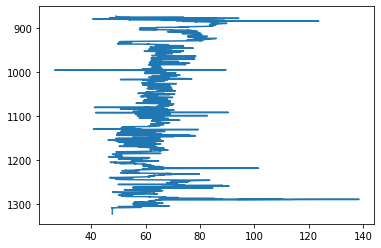

In [40]:
%matplotlib inline

matplotlib.pyplot.plot(log_list,log_depth)
matplotlib.pyplot.gca().invert_yaxis()

In [41]:
log_curve.Name()

'DT'

In [42]:
log_curve.TopDepth().Value(SeisWare.Unit.Meter)

1308.0492

Once we have the values in our DoublesList, we filter out any 
values that are not between our two well tops. We then filter our list once again to remove any null 
values, so they don't mess with out min/max/avg calculations.

We calculate the min, max, and avg by using the built-in Python function min, max, sum, and len, which return the minimum value of a list, return the maximum value of a list, return the sum of all the values of a list, and return the size of the list respectively.

In [43]:
log_curve_values_between_tops = [log_curve_value for i, log_curve_value in enumerate(log_curve_values) if top_well_top.MD() <= (log_curve.TopDepth() + (log_curve.DepthInc() * i)) <= base_well_top.MD()]
log_curve_values_between_tops_no_nulls = [log_curve_value for log_curve_value in log_curve_values_between_tops if log_curve_value != log_curve.NullValue()]
log_curve_minimum_value = min(log_curve_values_between_tops_no_nulls)
log_curve_maximum_value = max(log_curve_values_between_tops_no_nulls)
log_curve_average_value = sum(log_curve_values_between_tops_no_nulls) / len(log_curve_values_between_tops_no_nulls)

We calculate the min, max, and avg by using the built-in Python function min, max, sum, and len, which return the minimum value of a list, return the maximum value of a list, return the sum of all the values of a list, and return the size of the list respectively.

In [44]:
print("Number of values in log curve %s: %i" % (log_curve.Name(), len(log_curve_values)))
print("Number of values between well top %s and well top %s: %i" % (top_well_top.Formation(), base_well_top.Formation(), len(log_curve_values_between_tops)))
print("Minimum value between well top %s and well top %s: %.4f" % (top_well_top.Formation(), base_well_top.Formation(), log_curve_minimum_value))
print("Maximum value between well top %s and well top %s: %.4f" % (top_well_top.Formation(), base_well_top.Formation(), log_curve_maximum_value))
print("Average of values between well top %s and well top %s: %.4f" % (top_well_top.Formation(), base_well_top.Formation(), log_curve_average_value))
print()

Number of values in log curve DT: 2954
Number of values between well top Top 2 and well top Top 1: 206
Minimum value between well top Top 2 and well top Top 1: 40.5624
Maximum value between well top Top 2 and well top Top 1: 123.7224
Average of values between well top Top 2 and well top Top 1: 72.2349



In [45]:
def log_curve_type_to_string(log_curve_type):
    """
    Helper function to turn the log curve type into a string so we can print it.
    """
    if log_curve_type == SeisWare.LogCurveType_Sonic:
        return "Sonic"
    elif log_curve_type == SeisWare.LogCurveType_Density:
        return "Density"
    elif log_curve_type == SeisWare.LogCurveType_GammaRay:
        return "Gamma Ray"
    elif log_curve_type == SeisWare.LogCurveType_Depth:
        return "Depth"
    elif log_curve_type == SeisWare.LogCurveType_Synthetic:
        return "Synthetic"
    else:
        return "Unknown"

Write Log Curve to CSV

We first create a file for writing, where if the file exists it will overwrite it and if it doesn't exist it will create it.  


In [46]:
# Write the log curve header information
csv_file = open("%s.csv" % (log_curve.Name()), "w")


We then write a header which has details about the log curve, such as a name, description, units, and other information.

In [47]:
csv_file.write("Log Name: %s\n" % (log_curve.Name()))
csv_file.write("Description: %s\n" % (log_curve.Description()))
csv_file.write("Type: %s\n" % (log_curve_type_to_string(log_curve.Type())))
csv_file.write("Curve UOM: %s\n" % (log_curve.CurveUom()))
csv_file.write("Depth UOM: Meters\n")
csv_file.write("Source: %s\n" % (log_curve.Source()))
csv_file.write("Null Value: %.4f\n" % (log_curve.NullValue()))
csv_file.write("Top Depth: %.4f\n" % (log_curve.TopDepth().Value(SeisWare.Unit.Meter)))
csv_file.write("Base Depth: %.4f\n" % (log_curve.BaseDepth().Value(SeisWare.Unit.Meter)))
csv_file.write("Depth Increment: %.4f\n" % (log_curve.DepthInc().Value(SeisWare.Unit.Meter)))
csv_file.write("Depth,Value\n")

12

Next we get the values out of the log curve by creating a SeisWare.DoublesList object and calling Values on our LogCurve object, passing in the DoublesList. We then print out the depth/value pairs, calculating the depth based on the log curves top depth and depth increment.

In [48]:
 # Write the depth/value pairs
for idx, val in enumerate(log_curve_values):
    csv_file.write("%.4f,%.4f\n" % ((log_curve.TopDepth() + (log_curve.DepthInc() * idx)).Value(SeisWare.Unit.Meter), val))


Finally we close the file to ensure everything gets saved.


In [49]:
# Close the file
csv_file.close()

# Getting the project grids

We first get all the grids from the project by calling GetAll on the GridManager, which we get through our LoginInstance object. We then go through the GridList, looking for the grid with our passed in name.  It is also important to note that if you try to get the objects values before you call PopulateValues, it will throw.

   

In [50]:
    # Get the grids from the project
grid_list = SeisWare.GridList()

try:
        login_instance.GridManager().GetAll(grid_list)
except RuntimeError as err:
        handle_error("Failed to get the grids from the project", err)

   
    # Populate the grid with it's values


In [51]:
grid_name = 'Top 1 Grid'

# Get the grid we want
grids = [grid for grid in grid_list if grid.Name() == grid_name]
if not grids:
    print("No grids were found", file=sys.stderr)
    sys.exit(1)


# Populate the grid with it's values

When we find it, we populate it a return it. The reason you have to call PopulateValues instead of just getting the values when you call GetAll is because the values are stored in a file and could take longer to get.

In [52]:
try:
    login_instance.GridManager().PopulateValues(grids[0])
except RuntimeError as err:
    handle_error("Failed to populate the values of grid %s from the project" % (grid_name), err)


# Return the grid

In [53]:

grid = grids[0]


In [54]:
%matplotlib inline



We first get the values out of the grid by creating a SeisWare.GridValues object. We then call Values on our Grid object with the GridValues.  Finally we plot the grid as a triangle surface using matplotlib, setting a coolwarm color map and making the initial view be a top down one.

    

In [55]:
# Get the values from the grid
grid_values = SeisWare.GridValues()
grid.Values(grid_values)


Next we create our axes such that the x-axis has values from 0 to grid cell width, the y-axis has values from 0 to grid cell height, and the z-axis has the grid values.

In [56]:

# Create the axes to plot the grid
x_axis = list(range(grid_values.Width())) * grid_values.Height()
y_axis = [y for y in range(grid_values.Height()) for _ in range(grid_values.Width())]
z_axis = grid_values.Data()


Finally we plot the grid.

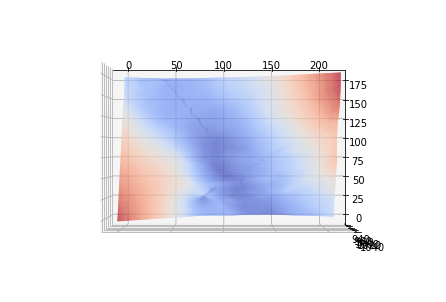

In [57]:

# plot the grid
plot_figure = matplotlib.pyplot.figure()
plot_figure.canvas.set_window_title(grid.Name())
plot_axes = mpl_toolkits.mplot3d.Axes3D(plot_figure)
plot_axes.plot_trisurf(x_axis, y_axis, z_axis, cmap=matplotlib.pyplot.cm.coolwarm)
plot_axes.view_init(elev=90.0, azim=-90.0)
matplotlib.pyplot.savefig('Grid.pdf')
matplotlib.pyplot.show()
